In [130]:

import pathlib
import calendar
import datetime

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = pathlib.Path('~/src/sealevel/data/noaa/amo.txt').expanduser()

In [36]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months = list(range(1, 13))

In [117]:
df = pd.read_table(path.open(), skiprows=1, sep='\s+', names=['year'] +  months, skipfooter=4, engine='python', na_values=[-999, -99, -99.990])

df = df.set_index('year')

df = df.stack().reset_index(name='amo')
df = df.rename({'level_1': 'month'}, axis=1)
df['date'] = df.apply(lambda x: datetime.datetime(int(x['year']), int(x['month']), 1), axis=1)
df = df[['date', 'amo']].set_index('date')

In [191]:
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=3):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


fs = 12       # sample rate
cutoff = 1/12 # desired cutoff frequency
filtered = butter_lowpass_filter(df['amo'].values, fs=fs, cutoff=cutoff)
len(filtered), len(df.index)

(1951, 1951)

Text(0,0.5,'Atlantic Multidecadal Ocean Index')

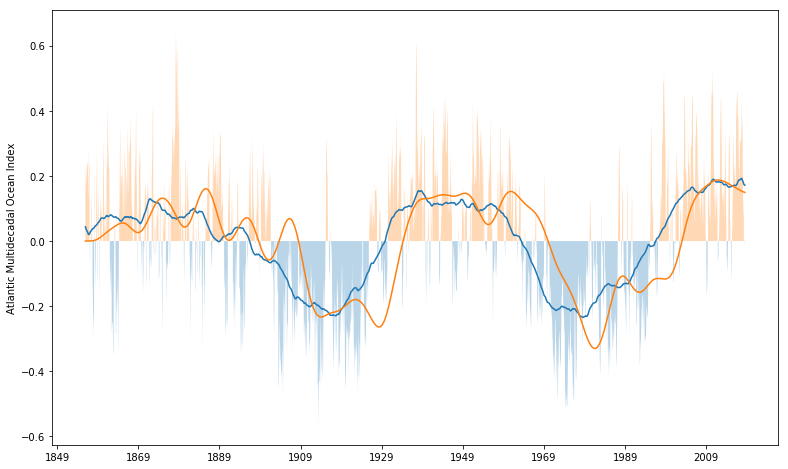

In [195]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(df.index, df['amo'].rolling(12*15, center=True, min_periods=12).mean())
ax.plot(df.index, filtered)
# ax.plot(df.index, df['amo'])
ax.fill_between(df.index, df['amo'], 0, alpha=0.3, where=df['amo']<=0)
ax.fill_between(df.index, df['amo'], 0, alpha=0.3, where=df['amo']>0)
ax.set_ylabel('Atlantic Multidecadal Ocean Index')